# Lab 7: Decision Trees


## Univariate trees


In an univariate tree, in each internal node, the test uses only one of the input dimensions $x = \{x_1,...,x_p\}$. 

If the used input dimension $x_j$ is discrete, taking one of n possible values. The decision node checks the value of $x_j$ and takes the corresponding branch, implementing an n-way split. 

If $x_j$ s numeric, the test is a comparison $f_m(x): x_j > w_{m0}$ where $w_{m0}$ is a suitably chosen threshold value.


## Classification trees
In a classification tree, the goodness of a split is quantified by an impurity measure. A split is pure if after split, for all branches, all instances choosing a branch belong to te same classes.

Let $N_m$ be the number of training instances reaching node $m$ and $N_m^i$ is the number of instances belonging to the class $C_i$. The probability of class $C_i$ in node $m$ is $\frac{N_m^i}{N_m}$

The total impurity after the split is measured by the entropy

$$-\sum_{j=1}^{n}\bigg{[} \frac{N_{mj}}{N_m}\sum_{i=1}^kp^i_{mj}log_2p^i_{mj}\bigg{]}$$

In the case of a numeric attribute, we also need to know the threshold $w_{m0}$ in order to calculate the entropy. For all attributes and for all split positions, we calculate the impurity and choose the one that has the minimum entropy. The tree construction continues recursively and in parallel for all branches that are not pure until all are pure. this is called classification and regression trees algorithm (CART)

When there is noise, growing the tree until it is purest, we may grow a very large tree adn it overfits. To alleviate such overfitting, tree construction ends when nodes become pure enought ($<\theta$).

The parameter $\theta$ is the complexity parameter. When it is small, the variance is high and the tree grows large.

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

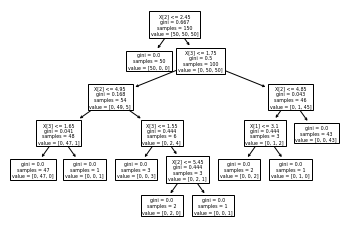

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf.fit(X, y)) 

## Regression trees
A regression tree is constructed in the same manner as a classification tree except that the impurity measure that is appropriate for classification is replaced by a measure appropirate for regression. 
 
In regression, the goodness of a split is measure by the mean squared error

$$E_m = \frac{1}{N_m}\sum_t(r^t-g_m)b_m(x^t)$$

$N_m$ is the number of training instances reaching the node $m$ and $b_m(x^t)$ is an indicator that an instance $x^t$ reaches node $m$. In a node, we use the mean of the required outputs of instances reaching the node

$$g_m=\frac{\sum_tb_m(x^t)r^t}{\sum_tb_m(x^t)}$$

If the error is acceptable, i.e., $E_m<\theta_r$, then a leaf node is created and it stores the $g_m$ value. This creates a piecewise constant approximation with discontinuities at leaf boundaries.

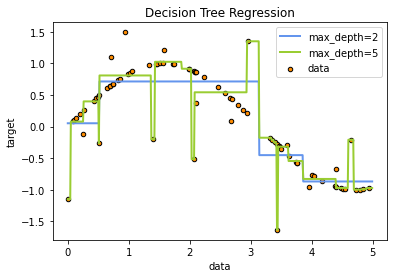

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()